we have been mostly using only this time series data and not other variables. **Only SARIMAX** model had the option of incorporating few **exogenous variables** but with the current development in the field of **machine learning** and **deep learning** we can build really **advanced prediction models** very easily in our software. On a large number of input variables and these models often are able to **predict** at a **much better accuracy** than the **normal times series** forecasting models.

What is the difference between **forecasting** and **prediction**?

The difference is only the inclusion of **temporal component**. Prediction is estimating outcome for unseen data but **forecasting** is a sub discipline of **prediction** where we are making prediction on the future **using times** it is so if you add the time dimension also and then try to predict future values then your prediction problem becomes a forecasting problem.

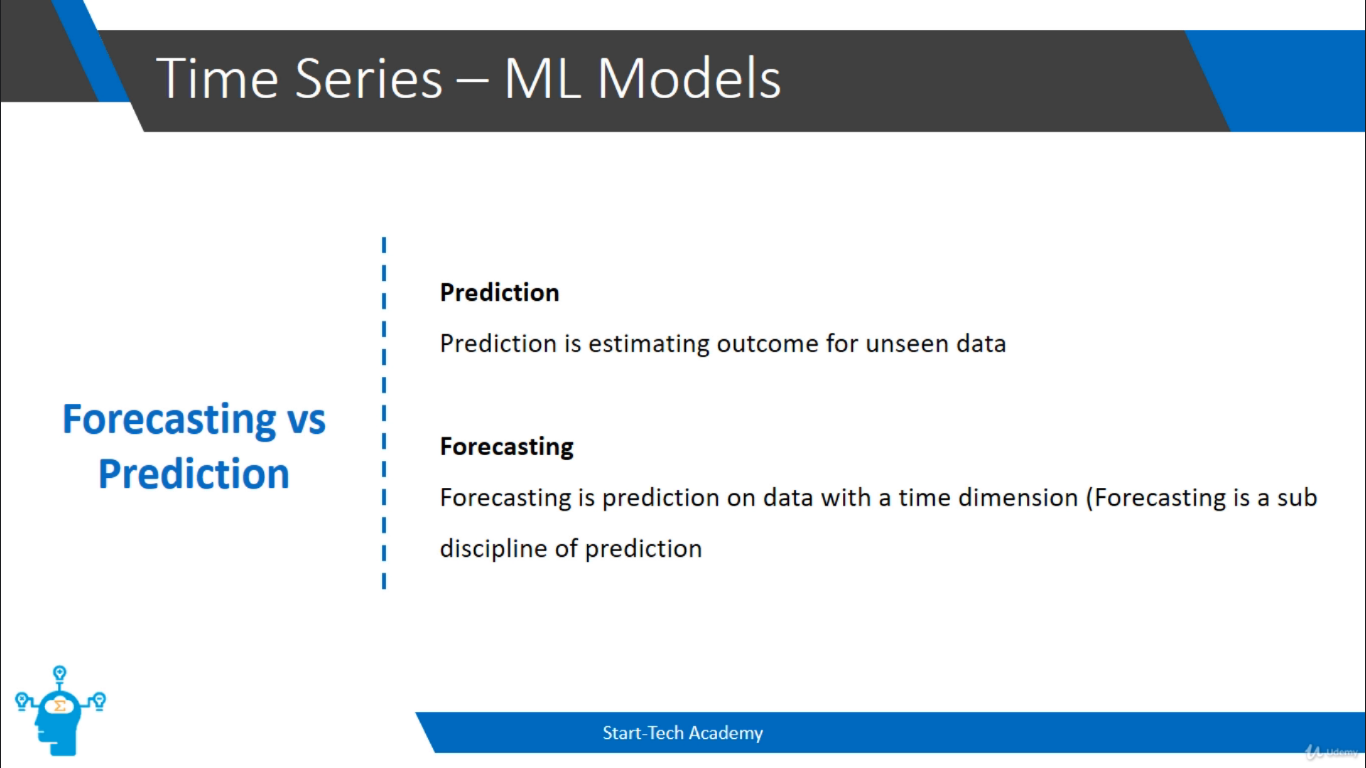

However you can always **add time series data** and **time features** to your dataset to make it a **forecasting** problem. So the same predictive models wait times that this data will work as forecasting models.

- While keeping **variable names**, try not to use space, instead use an **underscore**, for example, crime_rate. This is because some softwares do not accept spaces and variable names.
- Secondly, try to keep names such that you can recognize the actual variable that is avoid to put names like X1, X2, X3.

# Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
%matplotlib inline

# Load Data

In [3]:
current_dir = Path('.').resolve()

In [4]:
file_path = current_dir / 'data/House_Price.csv'

In [5]:
df = pd.read_csv(file_path, header=0)

In [6]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
0   24.0     0.00632       32.31     0.538     6.575  65.2   4.35   3.81   
1   21.6     0.02731       37.07     0.469     6.421  78.9   4.99   4.70   
2   34.7     0.02729       37.07     0.469     7.185  61.1   5.03   4.86   
3   33.4     0.03237       32.18     0.458     6.998  45.8   6.21   5.93   
4   36.2     0.06905       32.18     0.458     7.147  54.2   6.16   5.86   

   dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
0   4.18   4.01      24.7       4.98     YES       5.480      11.1920   
1   5.12   5.06      22.2       9.14      NO       7.332      12.1728   
2   5.01   4.97      22.2       4.03      NO       7.394     101.1200   
3   6.16   5.96      21.3       2.94     YES       9.268      11.2672   
4   6.37   5.86      21.3       5.33      NO       8.824      11.2896   

  waterbody  rainfall bus_ter     parks  
0     River        23     YES  0.049347  
1      Lake        42     YES  0.046146  
2      None        38     YES  0.045764  
3      Lake        45     YES  0.047151  
4      Lake        55     YES  0.039474

# Data Preprocessing

## Numerical

In [7]:
df.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    3.613524   41.136779    0.554695    6.284634   68.574901   
std      9.182176    8.601545    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006320   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.082045   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.256510   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    3.677083   48.100000    0.624000    6.623500   94.075000   
max     50.000000   88.976200   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.108580    2.119797    2.099203    2.164946    7.141062   
min      1.130000    0.920000    1.150000    0.730000   18.000000    1.730000   
25%      2.270000    1.940000    2.232500    1.940000   19.800000    6.950000   
50%      3.385000    3.010000    3.375000    3.070000   20.950000   11.360000   
75%      5.367500    4.992500    5.407500    4.985000   22.600000   16.955000   
max     12.320000   11.930000   12.320000   11.940000   27.400000   37.970000   

       n_hos_beds  n_hot_rooms    rainfall       parks  
count  498.000000   506.000000  506.000000  506.000000  
mean     7.899767    13.041605   39.181818    0.054454  
std      1.476683     5.238957   12.513697    0.010632  
min      5.268000    10.057600    3.000000    0.033292  
25%      6.634500    11.189800   28.000000    0.046464  
50%      7.999000    12.720000   39.000000    0.053507  
75%      9.088000    14.170800   50.000000    0.061397  
max     10.876000   101.120000   60.000000    0.086711

For crime_rate, there is a big difference between max and 75% which means that our data is skewed or there is an outlier.

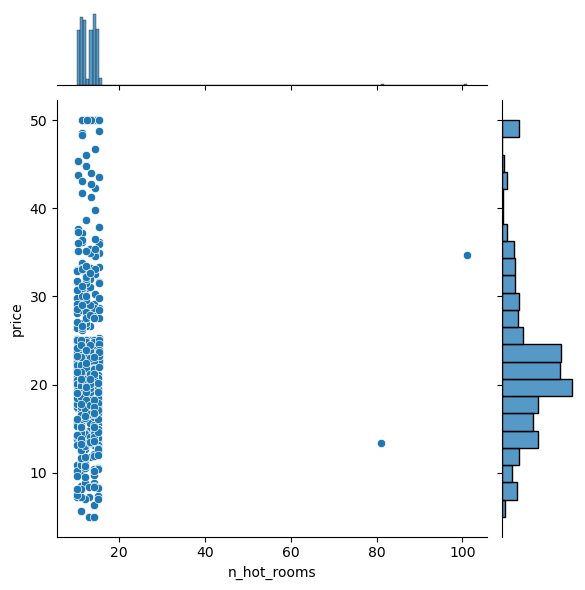

In [8]:
sns.jointplot(x='n_hot_rooms', y='price', data=df)

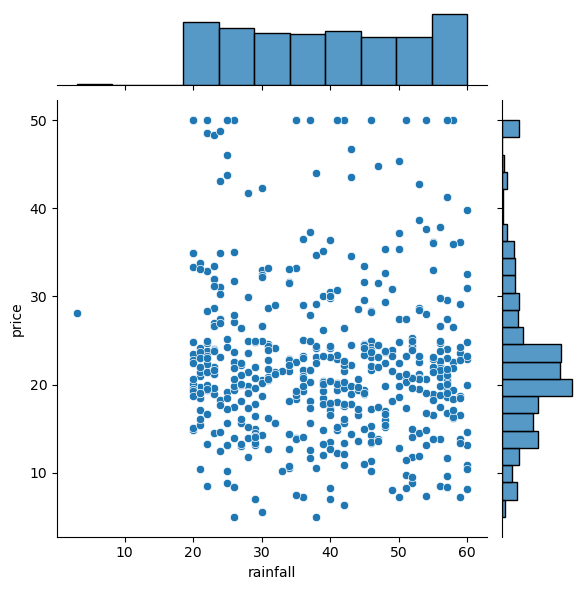

In [9]:
sns.jointplot(x=df['rainfall'], y=df['price'])

## Categorical

<AxesSubplot:xlabel='airport', ylabel='count'>

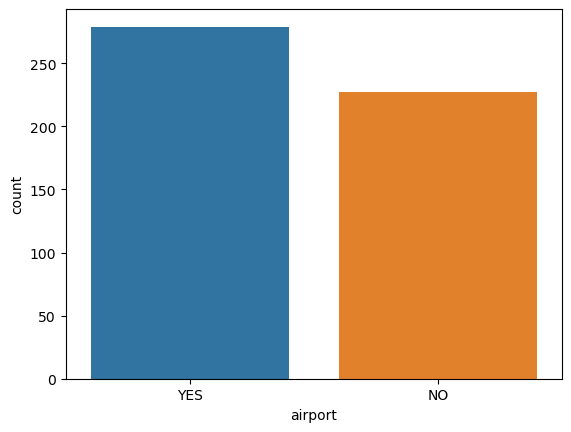

In [10]:
sns.countplot(data=df, x='airport')

<AxesSubplot:xlabel='waterbody', ylabel='count'>

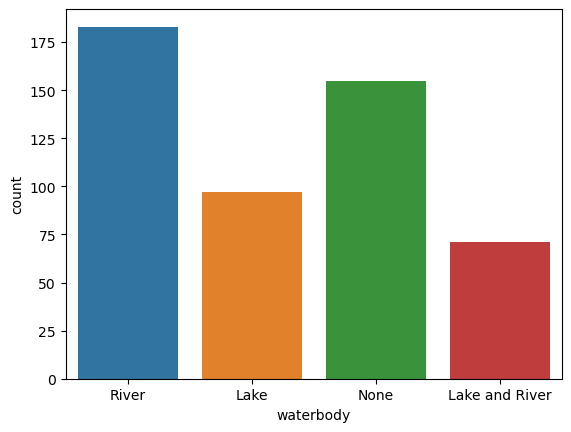

In [11]:
sns.countplot(data=df, x='waterbody')

<AxesSubplot:xlabel='bus_ter', ylabel='count'>

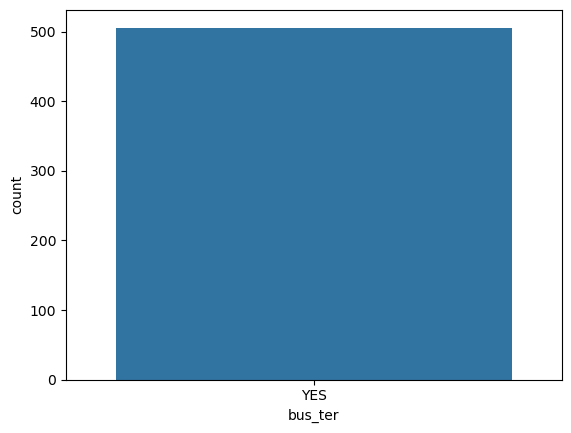

In [12]:
sns.countplot(data=df, x='bus_ter')

## Outliers

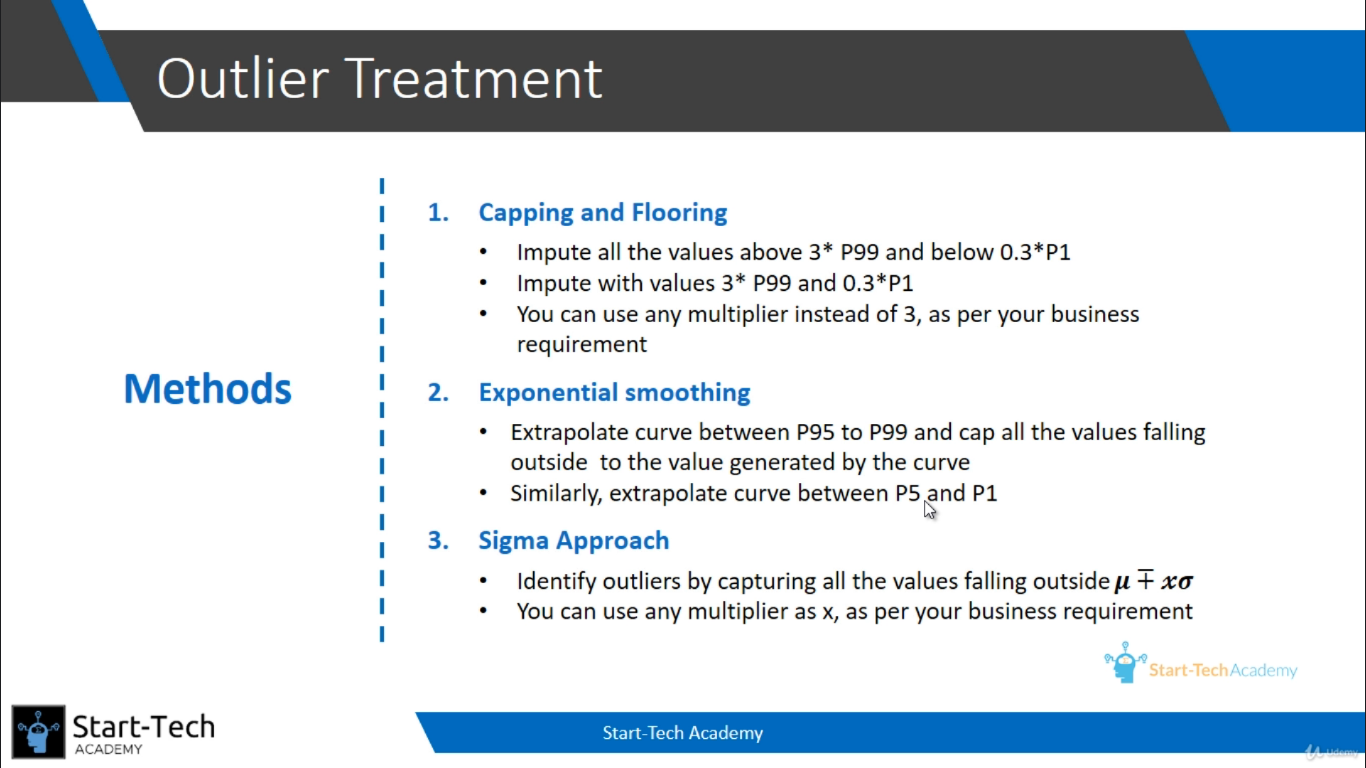

In [13]:
np.percentile(df['n_hot_rooms'], [99])

array([15.39952])

In [14]:
np.percentile(df['n_hot_rooms'], [99])[0]

15.39952

In [15]:
uv = np.percentile(df['n_hot_rooms'], [99])[0]

In [16]:
df[df['n_hot_rooms'] > uv]

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
2     34.7     0.02729       37.07    0.4690     7.185  61.1   5.03   4.86   
166   50.0     2.01019       49.58    0.6050     7.929  96.2   2.11   1.91   
204   50.0     0.02009       32.68    0.4161     8.034  31.9   5.41   4.80   
267   50.0     0.57834       33.97    0.5750     8.297  67.0   2.60   2.13   
369   50.0     5.66998       48.10    0.6310     6.683  96.8   1.55   1.28   
423   13.4     7.05042       48.10    0.6140     6.103  85.1   2.08   1.80   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
2     5.01   4.97      22.2       4.03      NO       7.394       101.12   
166   2.31   1.86      25.3       3.70     YES       8.300        15.40   
204   5.28   4.99      25.3       2.88     YES       8.900        15.40   
267   2.43   2.52      27.0       7.44     YES       8.000        15.40   
369   1.65   0.94      19.8       3.73     YES       6.700        15.40   
423   2.34   1.87      19.8      23.29      NO       8.268        81.12   

    waterbody  rainfall bus_ter     parks  
2        None        38     YES  0.045764  
166     River        37     YES  0.052105  
204     River        51     YES  0.044178  
267      None        42     YES  0.063235  
369     River        58     YES  0.067477  
423      Lake        29     YES  0.063344

In [17]:
df.loc[df['n_hot_rooms'] > 3 * uv, 'n_hot_rooms']

2      101.12
423     81.12
Name: n_hot_rooms, dtype: float64

In [18]:
df.loc[df['n_hot_rooms'] > 3 * uv, 'n_hot_rooms'] = 3 * uv

In [19]:
df[df['n_hot_rooms'] > uv]

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
2     34.7     0.02729       37.07    0.4690     7.185  61.1   5.03   4.86   
166   50.0     2.01019       49.58    0.6050     7.929  96.2   2.11   1.91   
204   50.0     0.02009       32.68    0.4161     8.034  31.9   5.41   4.80   
267   50.0     0.57834       33.97    0.5750     8.297  67.0   2.60   2.13   
369   50.0     5.66998       48.10    0.6310     6.683  96.8   1.55   1.28   
423   13.4     7.05042       48.10    0.6140     6.103  85.1   2.08   1.80   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
2     5.01   4.97      22.2       4.03      NO       7.394     46.19856   
166   2.31   1.86      25.3       3.70     YES       8.300     15.40000   
204   5.28   4.99      25.3       2.88     YES       8.900     15.40000   
267   2.43   2.52      27.0       7.44     YES       8.000     15.40000   
369   1.65   0.94      19.8       3.73     YES       6.700     15.40000   
423   2.34   1.87      19.8      23.29      NO       8.268     46.19856   

    waterbody  rainfall bus_ter     parks  
2        None        38     YES  0.045764  
166     River        37     YES  0.052105  
204     River        51     YES  0.044178  
267      None        42     YES  0.063235  
369     River        58     YES  0.067477  
423      Lake        29     YES  0.063344

In [20]:
np.percentile(df['rainfall'], [1])[0]

20.0

In [21]:
lv = np.percentile(df['rainfall'], [1])[0]

In [22]:
df[df['rainfall'] < lv]

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
213   28.1     0.14052       40.59     0.489     6.375  32.3   4.11   3.92   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
213   4.18   3.57      21.4       9.38     YES       7.562      10.2248   

    waterbody  rainfall bus_ter     parks  
213      None         3     YES  0.044019

In [24]:
df.loc[df['rainfall'] < 0.3 * lv, 'rainfall'] = 0.3 * lv

In [25]:
df[df['rainfall'] < lv]

price  crime_rate  resid_area  air_qual  room_num   age  dist1  dist2  \
213   28.1     0.14052       40.59     0.489     6.375  32.3   4.11   3.92   

     dist3  dist4  teachers  poor_prop airport  n_hos_beds  n_hot_rooms  \
213   4.18   3.57      21.4       9.38     YES       7.562      10.2248   

    waterbody  rainfall bus_ter     parks  
213      None         6     YES  0.044019

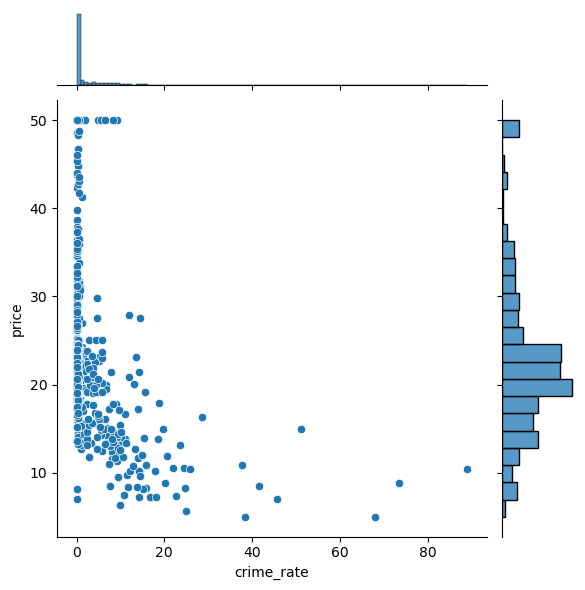

In [26]:
sns.jointplot(x='crime_rate', y='price', data=df)

First, we'll transform this variable and after that, we'll look out for outliers.

## Missing Values

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [28]:
df['n_hos_beds'] = df['n_hos_beds'].fillna(df['n_hos_beds'].mean())

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

## Seasonality

To remove seasonality from the data, we usually find a correction factor, which we multiply with the data to get a normalized value.

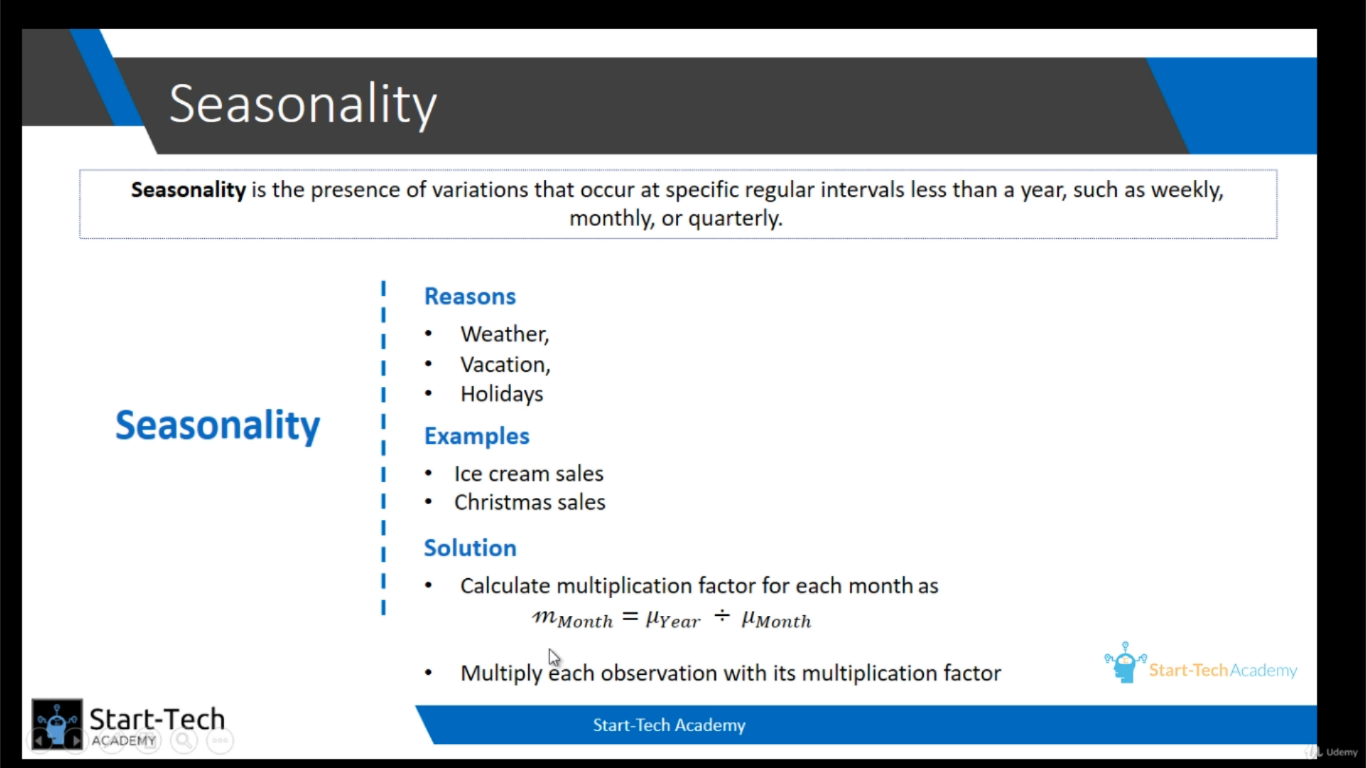

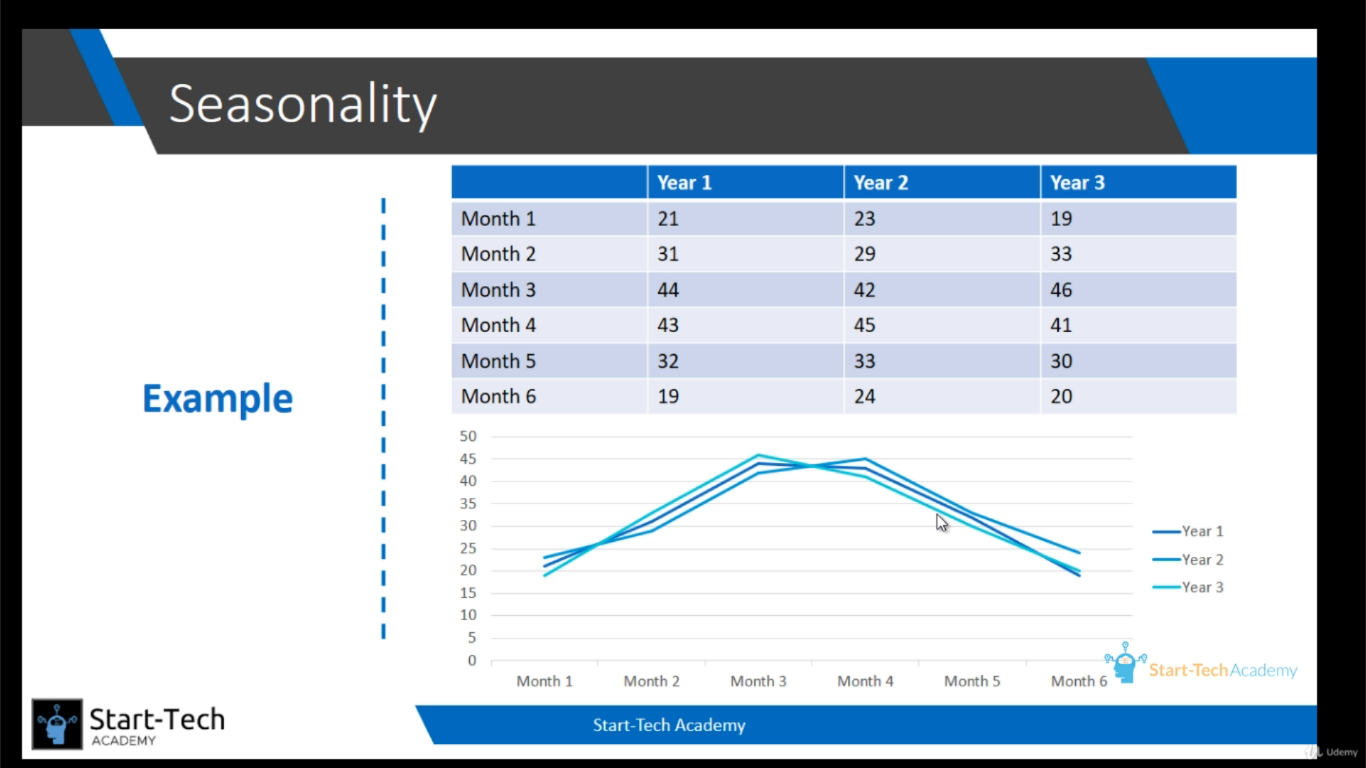

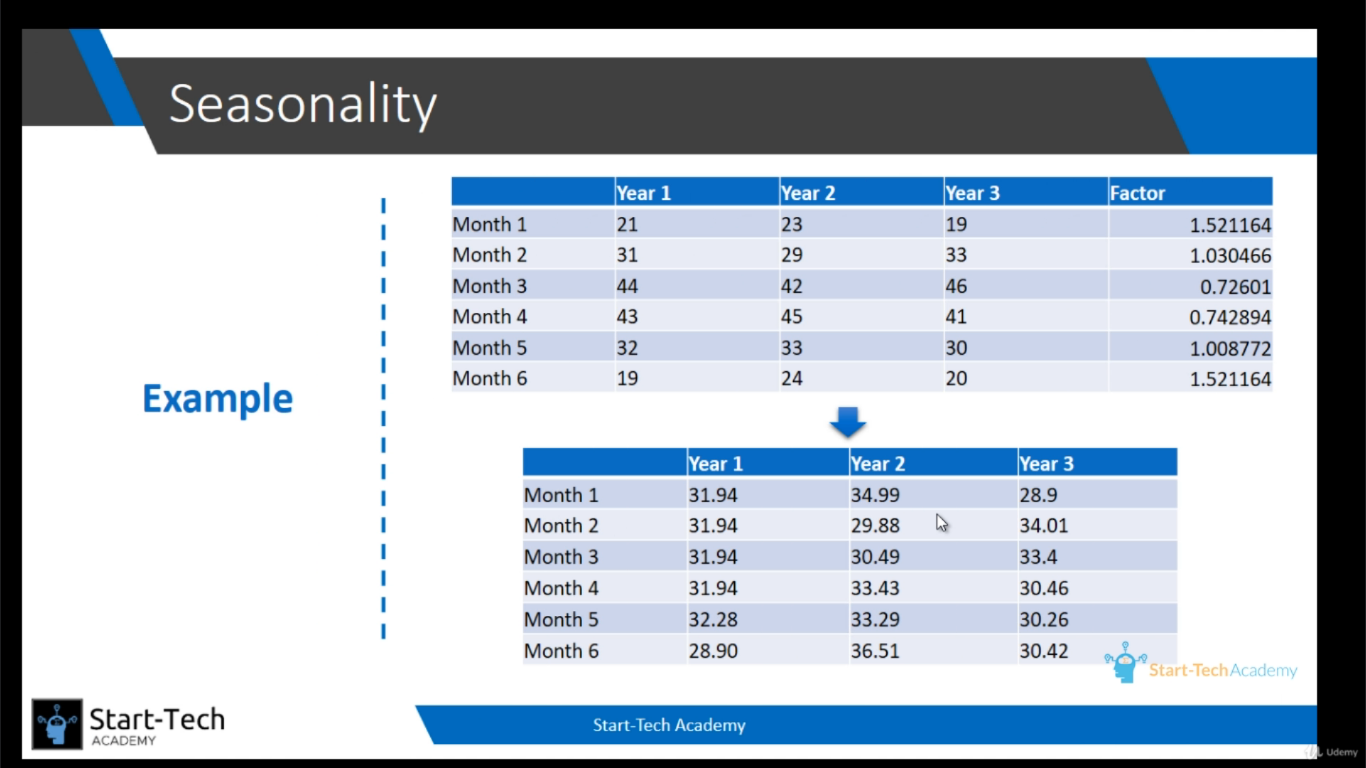

## Bivariate Analysis

There are two popular ways of looking at two variable relationship:
- One is a graphical way, which is called **scatterplot**: How we should use scatterplot as we should first plodder **scatterplot** of each **independent variable** against the **dependent variables**. Then we should ask, is there a **visible relationship** between these variables?
    - If there is none. We should go back and check Business knowledge.
    - If there is a **visible relationship**, then we should see if it is a **linear relationship** or not.
        - If it is a **linear relationship**, we will straight away use that variable for **linear regression** analysis.
        - If it is some **other sort of relationship**, we will **transform** the variables so that the transformed variable is now **linearly** related.
- Second one is tabular way, which is called **correlation matrix**: Then we will plot the correlation matrix. We will look for the following two things: 
    - One, if the value is **low**, that is **near zero**. Between the dependent and the independent variables. This will basically represent that **probably** there is **no direct correlation** between the dependent and the independent variable. And we can consider **discarding** that independent variable. 
    - Second, if there is very **high correlation** amongst the independent variables. So if we take two independent variables and correlation between these two us coming too high, it may suggest that the independent variables that we have selected **may not be truly independent**. And we may have to let go one of them because **having both** in the analysis leads to a type of **error** called **Multi-collinearity**. We can consider that will be removing any variable of the pair of independent variables, which show very high correlation coefficient, say, more than 0.8.

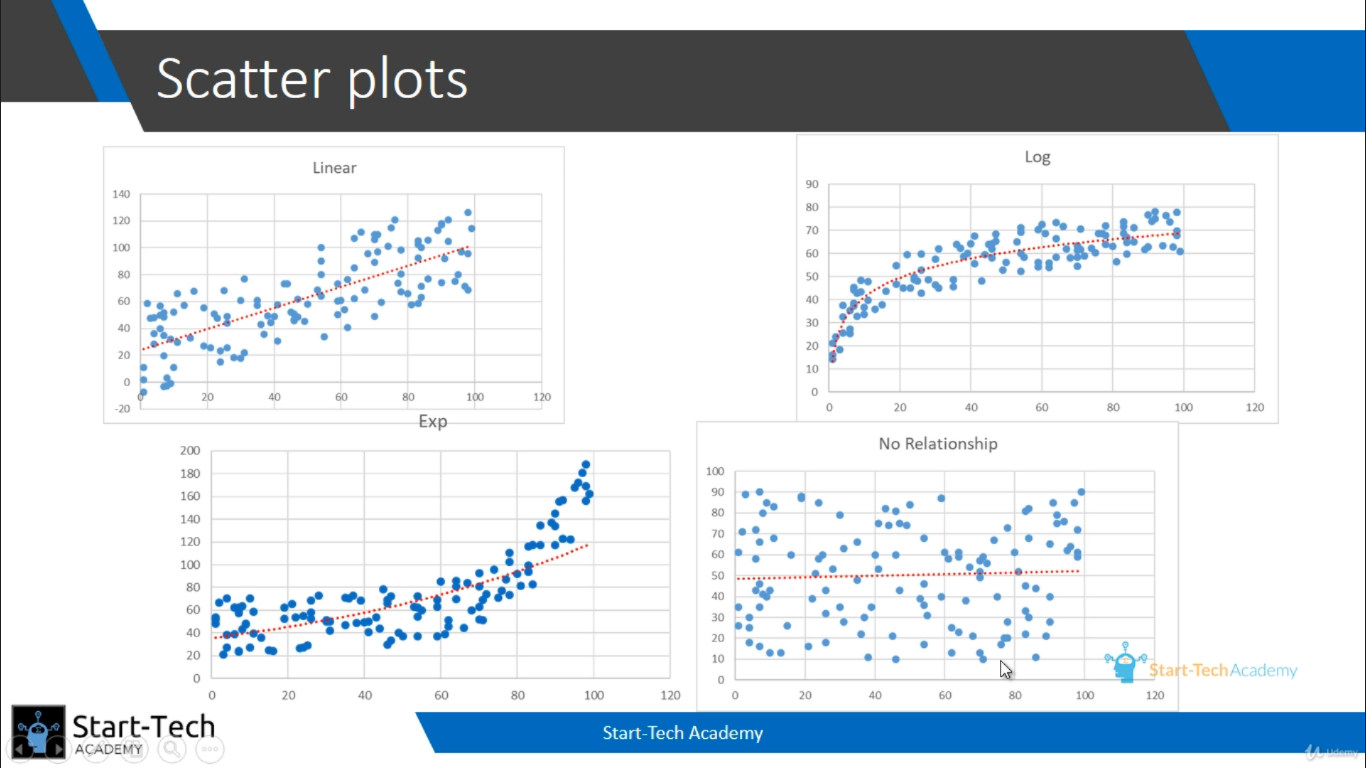

When the relationship between the two variables is some other functional form will need to **transform** the variable. We can modify the independent variable so that the modified version has a **more linear relationship** with the dependent variable. Keep in mind, **transforming** a variable is **not** a **mandatory** thing.

We are only transforming variables with the hope that it will eventually fit the model better once we know how to run the model. I will suggest that you run the model without doing the transformations and then we're doing the transformations so that you can see which of these two models fit your data better.

## Transform Variable

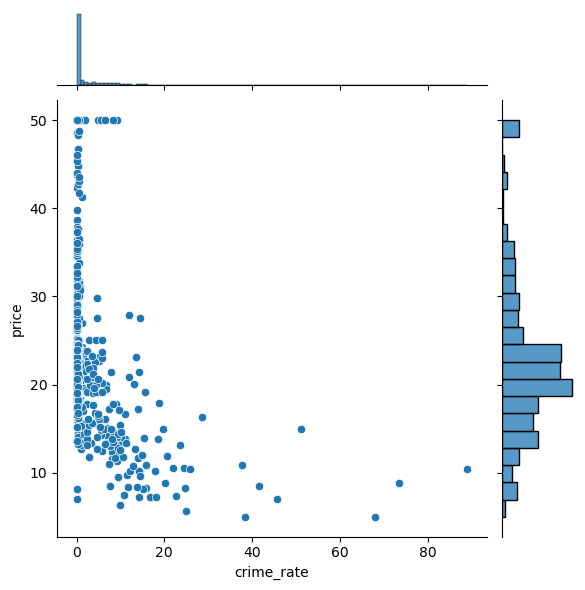

In [30]:
sns.jointplot(x='crime_rate', y='price', data=df)

The curve looks like **logarithmic curve**. And we need to **transform** this curve to have a **linear relationship** between X and Y.

Since most of the values are near zero. And logoff zero is not defined. And it tends towards minus infinity. So to remove this, we will add a value of one to our crime rate.

In [32]:
df['crime_rate'] = np.log1p(df['crime_rate'])

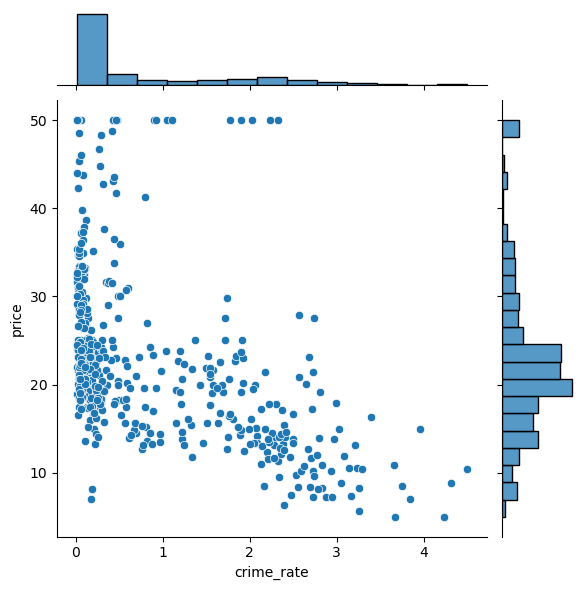

In [33]:
sns.jointplot(x='crime_rate', y='price', data=df)

now we are getting somewhat linear plot.

We have four variables for distances. dist 1 dist 2 dist 3 dist 4 All these variables are conveying the same information? Which is the distance from the employment hub. So let's just create a average variable of this for distances to convey the same information in a single variable. 

In [35]:
df['avg_dist'] = (df['dist1'] + df['dist2'] + df['dist3'] + df['dist4']) / 4

In [36]:
df.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    0.813418   41.136779    0.554695    6.284634   68.574901   
std      9.182176    1.022731    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006300   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.078853   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.228336   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    1.542674   48.100000    0.624000    6.623500   94.075000   
max     50.000000    4.499545   57.740000    0.871000    8.780000  100.000000   

            dist1       dist2       dist3       dist4    teachers   poor_prop  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.971996    3.628775    3.960672    3.618972   21.544466   12.653063   
std      2.108532    2.108580    2.119797    2.099203    2.164946    7.141062   
min      1.130000    0.920000    1.150000    0.730000   18.000000    1.730000   
25%      2.270000    1.940000    2.232500    1.940000   19.800000    6.950000   
50%      3.385000    3.010000    3.375000    3.070000   20.950000   11.360000   
75%      5.367500    4.992500    5.407500    4.985000   22.600000   16.955000   
max     12.320000   11.930000   12.320000   11.940000   27.400000   37.970000   

       n_hos_beds  n_hot_rooms    rainfall       parks    avg_dist  
count  506.000000   506.000000  506.000000  506.000000  506.000000  
mean     7.899767    12.864050   39.187747    0.054454    3.795104  
std      1.464939     2.688778   12.497221    0.010632    2.105859  
min      5.268000    10.057600    6.000000    0.033292    1.127500  
25%      6.659000    11.189800   28.000000    0.046464    2.100625  
50%      7.963000    12.720000   39.000000    0.053507    3.207500  
75%      9.076000    14.170800   50.000000    0.061397    5.187500  
max     10.876000    46.198560   60.000000    0.086711   12.127500

So depending on your business and depending on your business knowledge, try to evaluate all such variations (min and max) and choose the appropriate dummy variable.

In [38]:
df.drop(columns=['dist1', 'dist2', 'dist3', 'dist4'], inplace=True)

In [40]:
df.describe()

price  crime_rate  resid_area    air_qual    room_num         age  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    22.528854    0.813418   41.136779    0.554695    6.284634   68.574901   
std      9.182176    1.022731    6.860353    0.115878    0.702617   28.148861   
min      5.000000    0.006300   30.460000    0.385000    3.561000    2.900000   
25%     17.025000    0.078853   35.190000    0.449000    5.885500   45.025000   
50%     21.200000    0.228336   39.690000    0.538000    6.208500   77.500000   
75%     25.000000    1.542674   48.100000    0.624000    6.623500   94.075000   
max     50.000000    4.499545   57.740000    0.871000    8.780000  100.000000   

         teachers   poor_prop  n_hos_beds  n_hot_rooms    rainfall  \
count  506.000000  506.000000  506.000000   506.000000  506.000000   
mean    21.544466   12.653063    7.899767    12.864050   39.187747   
std      2.164946    7.141062    1.464939     2.688778   12.497221   
min     18.000000    1.730000    5.268000    10.057600    6.000000   
25%     19.800000    6.950000    6.659000    11.189800   28.000000   
50%     20.950000   11.360000    7.963000    12.720000   39.000000   
75%     22.600000   16.955000    9.076000    14.170800   50.000000   
max     27.400000   37.970000   10.876000    46.198560   60.000000   

            parks    avg_dist  
count  506.000000  506.000000  
mean     0.054454    3.795104  
std      0.010632    2.105859  
min      0.033292    1.127500  
25%      0.046464    2.100625  
50%      0.053507    3.207500  
75%      0.061397    5.187500  
max      0.086711   12.127500

## Non Usable Variable

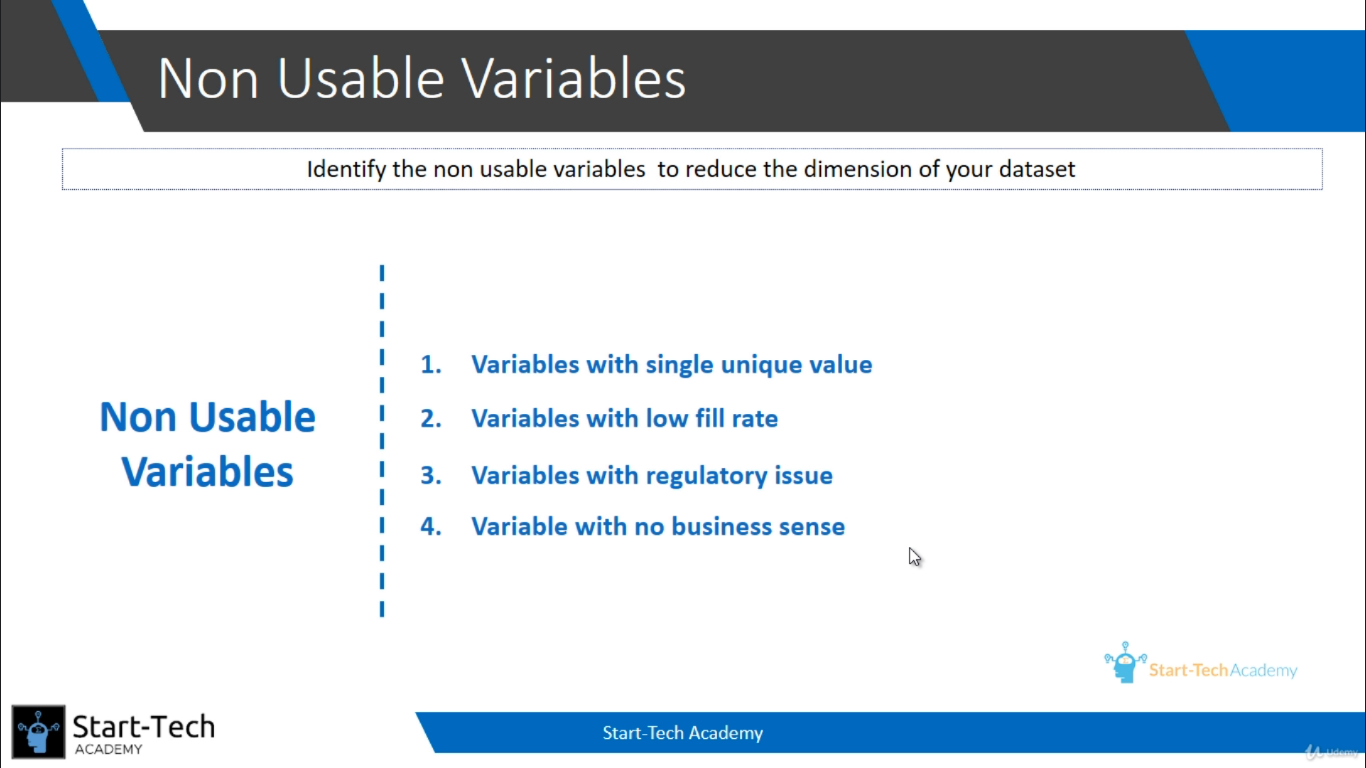

- Even for non categorical variables, if they have **only one value** throughout. That is basically not a variable. That is basically behaving as a **constant**. We **don't need** such variables and we will be **deleting** them.

- Variables with low fill rate are the second point. Suppose we had only 50 values and the rest 450 values were empty. Does it make sense to impute values in that case? In such a case will not be able to capture the actual effect of that variable on the output. Even if you keep the variable and impute mean value in the missing places and run the analysis nearly always, there will not be any significant relationship between such a variable and the output.

- Remember that businesses are working within a regulatory framework. and regulatory framework may not allow usage of certain variables. For example, if you decide to build a model. To identify credit worthiness of a customer. bases the profile of a customer. And your model sees that a person's gender. or religion is a significant variable. Now, if you base your decisions on this model. You will be treating people of different genders or different religions differently. This situation can be considered as one of discrimination. And if you cannot base your decision on a particular variable, that is, if you will not accept the result of your model basis, a particular variable. There is no point keeping that variable. So keep this in mind while selecting sensitive variables for analysis.

- Don't just take the variable because you have data available for it. I mean, yes, we can do exploratory analysis where without business knowledge, we try to identify a pattern. But when we are establishing a cause and effect relationship, try to keep only variables that make logical sense. To complement your understanding whether the relationship is related or not, you should use the bi variate analysis.

As you have seen, identifying, adding and removing variables is an iterative process, and we'll be doing it even post regression analysis.

Delete the bus terminal variable since it was only taking one single value.

In [41]:
del df['bus_ter']

In [42]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  teachers  \
0   24.0    0.006300       32.31     0.538     6.575  65.2      24.7   
1   21.6    0.026944       37.07     0.469     6.421  78.9      22.2   
2   34.7    0.026924       37.07     0.469     7.185  61.1      22.2   
3   33.4    0.031857       32.18     0.458     6.998  45.8      21.3   
4   36.2    0.066770       32.18     0.458     7.147  54.2      21.3   

   poor_prop airport  n_hos_beds  n_hot_rooms waterbody  rainfall     parks  \
0       4.98     YES       5.480     11.19200     River        23  0.049347   
1       9.14      NO       7.332     12.17280      Lake        42  0.046146   
2       4.03      NO       7.394     46.19856      None        38  0.045764   
3       2.94     YES       9.268     11.26720      Lake        45  0.047151   
4       5.33      NO       8.824     11.28960      Lake        55  0.039474   

   avg_dist  
0    4.0875  
1    4.9675  
2    4.9675  
3    6.0650  
4    6.0625

## Dummy Variables

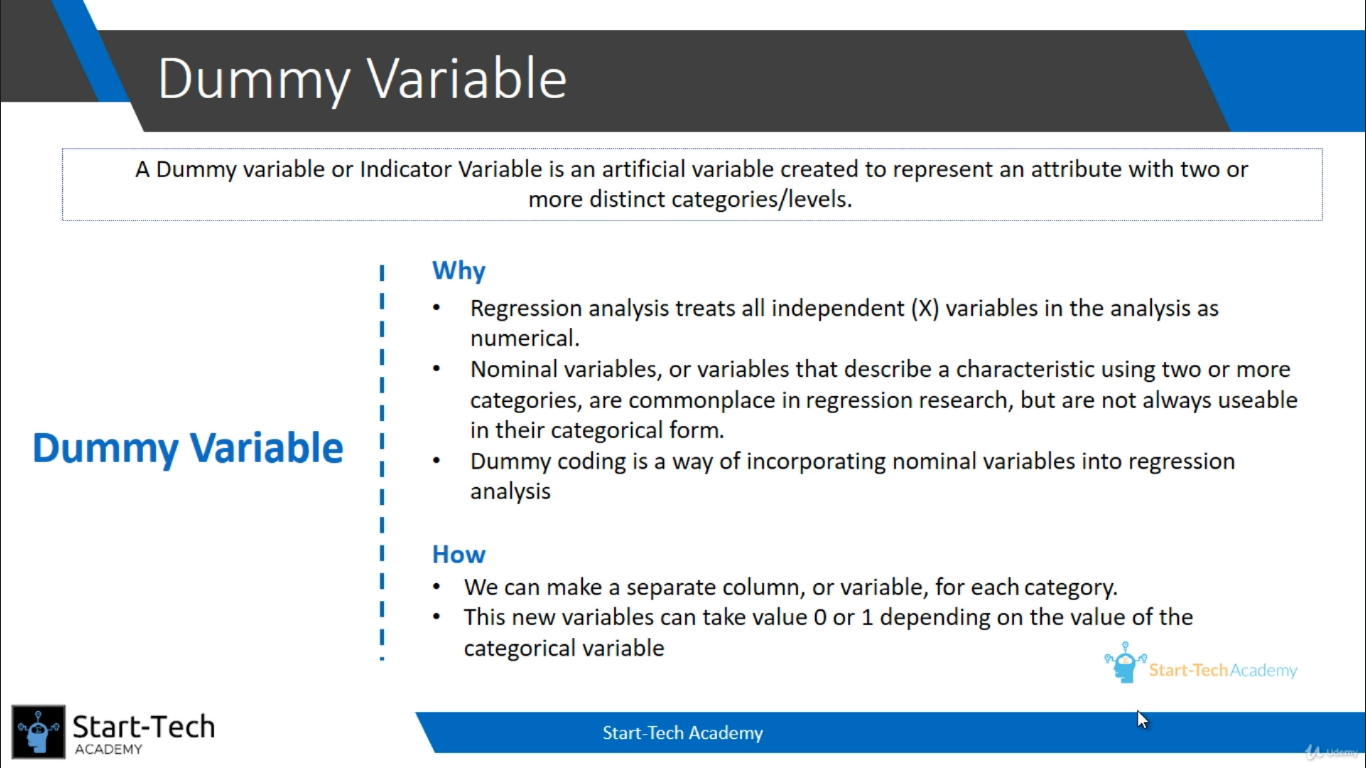

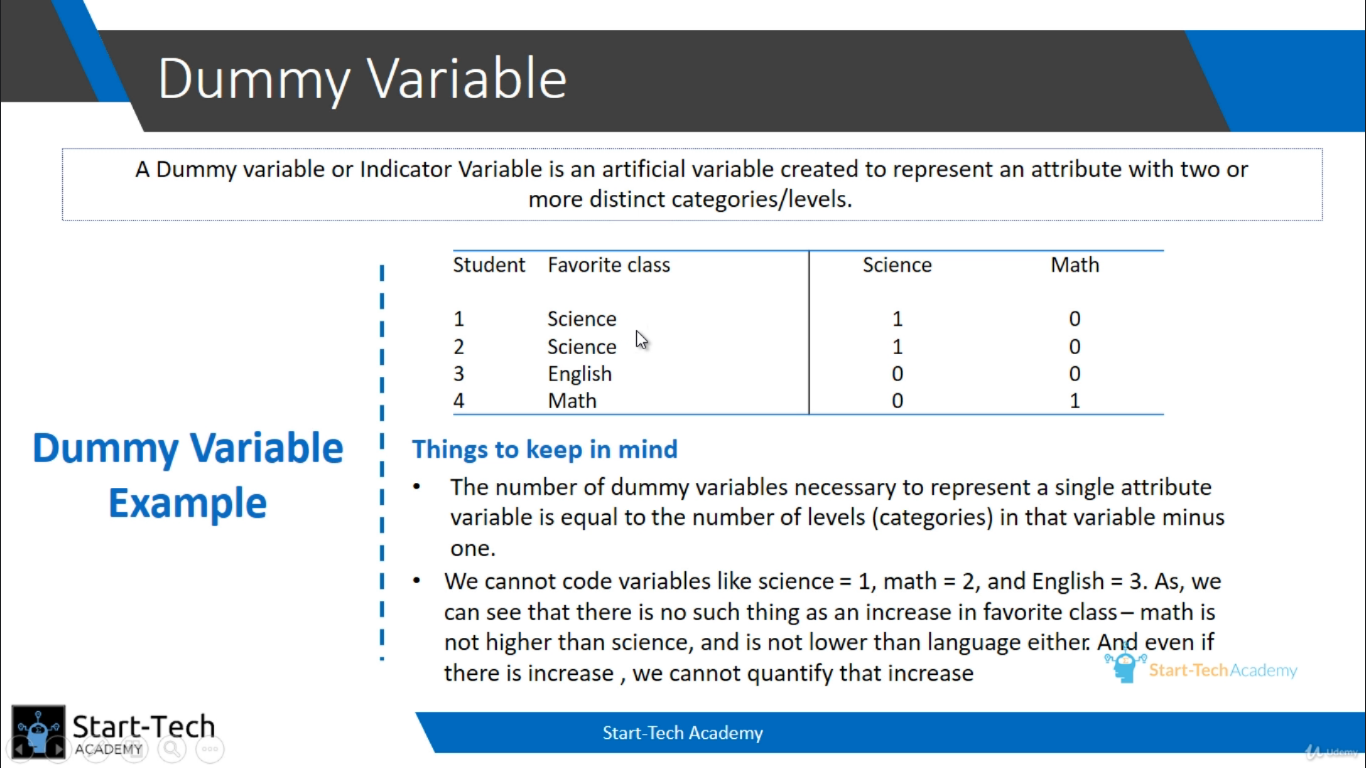

In [43]:
df = pd.get_dummies(df)

In [44]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  teachers  \
0   24.0    0.006300       32.31     0.538     6.575  65.2      24.7   
1   21.6    0.026944       37.07     0.469     6.421  78.9      22.2   
2   34.7    0.026924       37.07     0.469     7.185  61.1      22.2   
3   33.4    0.031857       32.18     0.458     6.998  45.8      21.3   
4   36.2    0.066770       32.18     0.458     7.147  54.2      21.3   

   poor_prop  n_hos_beds  n_hot_rooms  rainfall     parks  avg_dist  \
0       4.98       5.480     11.19200        23  0.049347    4.0875   
1       9.14       7.332     12.17280        42  0.046146    4.9675   
2       4.03       7.394     46.19856        38  0.045764    4.9675   
3       2.94       9.268     11.26720        45  0.047151    6.0650   
4       5.33       8.824     11.28960        55  0.039474    6.0625   

   airport_NO  airport_YES  waterbody_Lake  waterbody_Lake and River  \
0           0            1               0                         0   
1           1            0               1                         0   
2           1            0               0                         0   
3           0            1               1                         0   
4           1            0               1                         0   

   waterbody_None  waterbody_River  
0               0                1  
1               0                0  
2               1                0  
3               0                0  
4               0                0

if you remember, we told you that the **number of dummy variable** should be **one less** than the **number of categories**.

We call it full negative correlation.

In [45]:
df.drop(columns=['airport_NO', 'waterbody_None'], inplace=True)

In [46]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  teachers  \
0   24.0    0.006300       32.31     0.538     6.575  65.2      24.7   
1   21.6    0.026944       37.07     0.469     6.421  78.9      22.2   
2   34.7    0.026924       37.07     0.469     7.185  61.1      22.2   
3   33.4    0.031857       32.18     0.458     6.998  45.8      21.3   
4   36.2    0.066770       32.18     0.458     7.147  54.2      21.3   

   poor_prop  n_hos_beds  n_hot_rooms  rainfall     parks  avg_dist  \
0       4.98       5.480     11.19200        23  0.049347    4.0875   
1       9.14       7.332     12.17280        42  0.046146    4.9675   
2       4.03       7.394     46.19856        38  0.045764    4.9675   
3       2.94       9.268     11.26720        45  0.047151    6.0650   
4       5.33       8.824     11.28960        55  0.039474    6.0625   

   airport_YES  waterbody_Lake  waterbody_Lake and River  waterbody_River  
0            1               0                         0                1  
1            0               1                         0                0  
2            0               0                         0                0  
3            1               1                         0                0  
4            0               1                         0                0

## Correlation Analysis

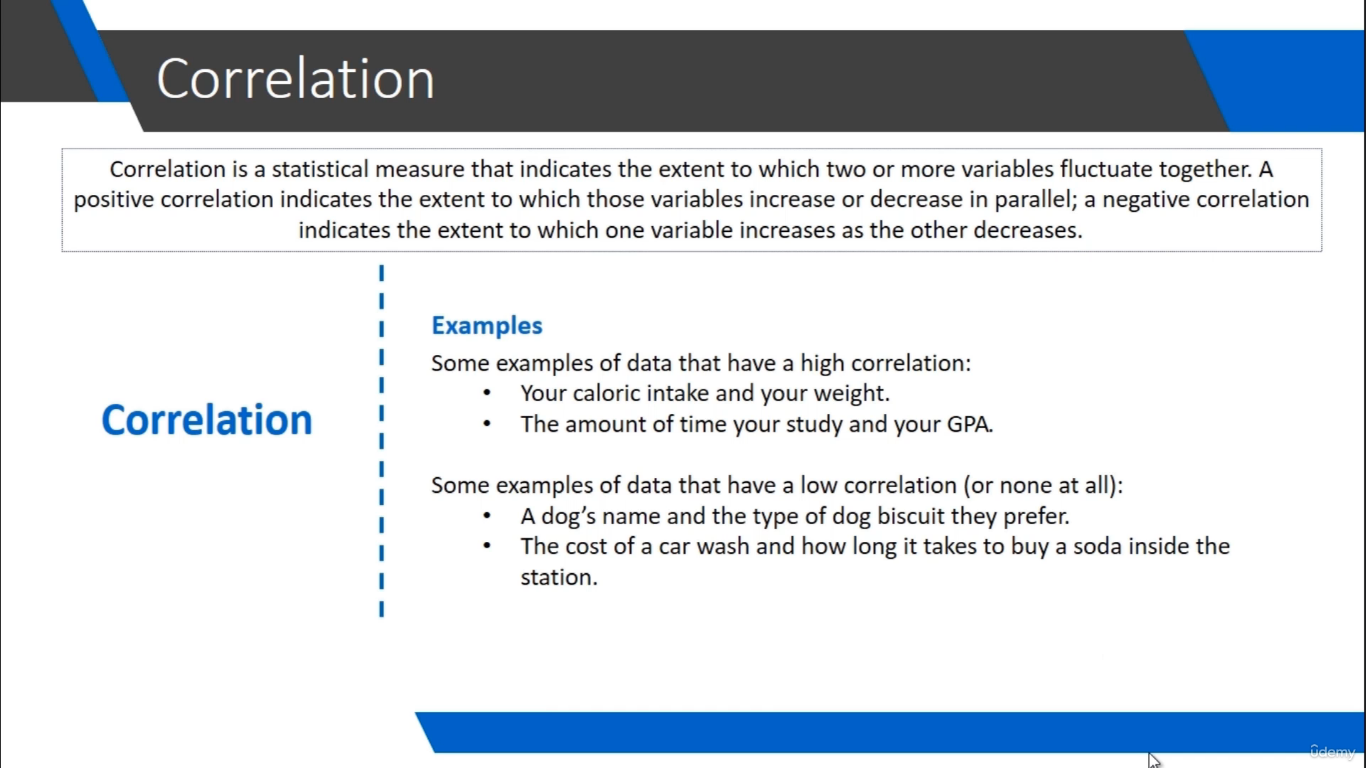

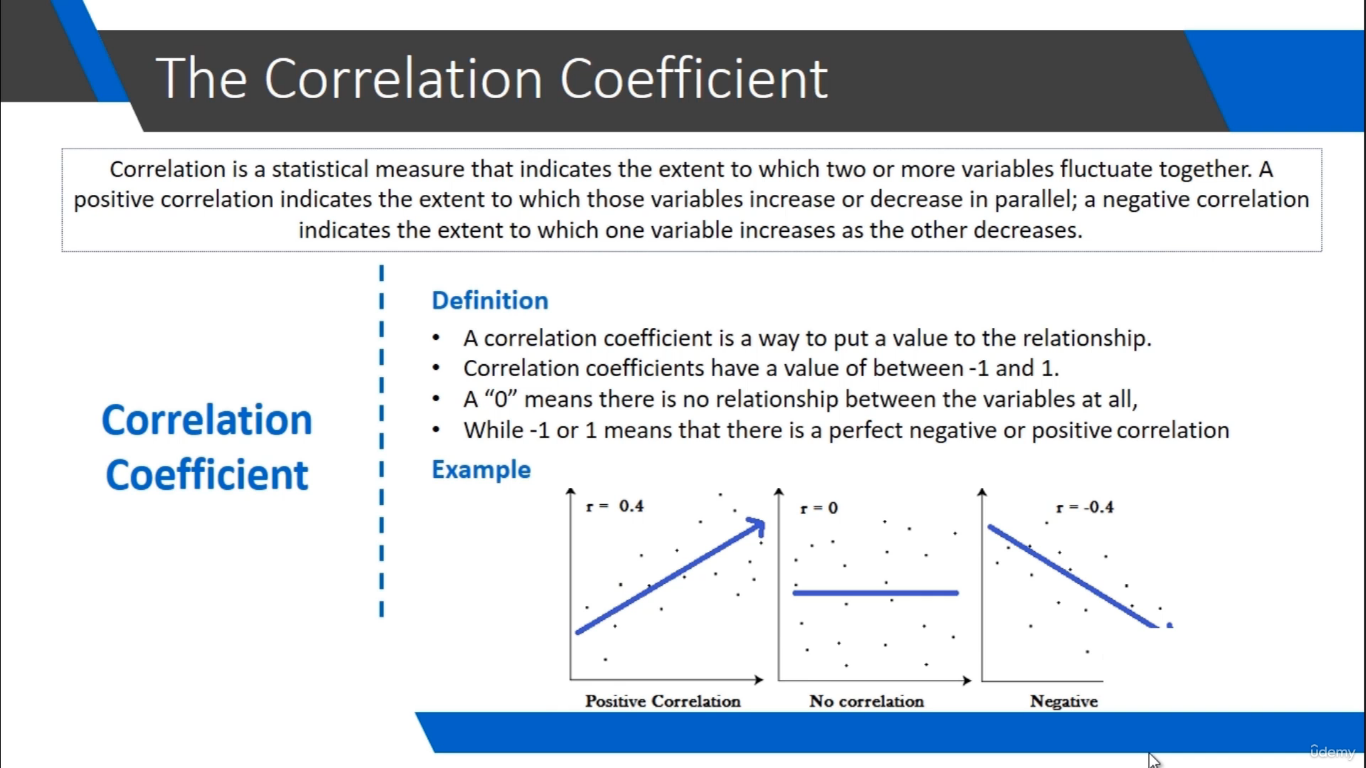

As a rule of thumb, if you find the value of correlation coefficient as **less than 0.1**, we say that there is **very low correlation** between the two variables, and if we find that it is **more than 0.8**, we say that it is **very high correlation** between the variables.

It is important to note the **difference** between **correlation** and **causation**. **Correlation** is just representing. Whether the values in **two variables** for our sample dataset are **moving together** or not. But it **does not tell** us anything about **cause effect relationship** between the two. We cannot say that because correlation coefficient is high. That increase in one variable will lead to increase or decrease in the other variable.

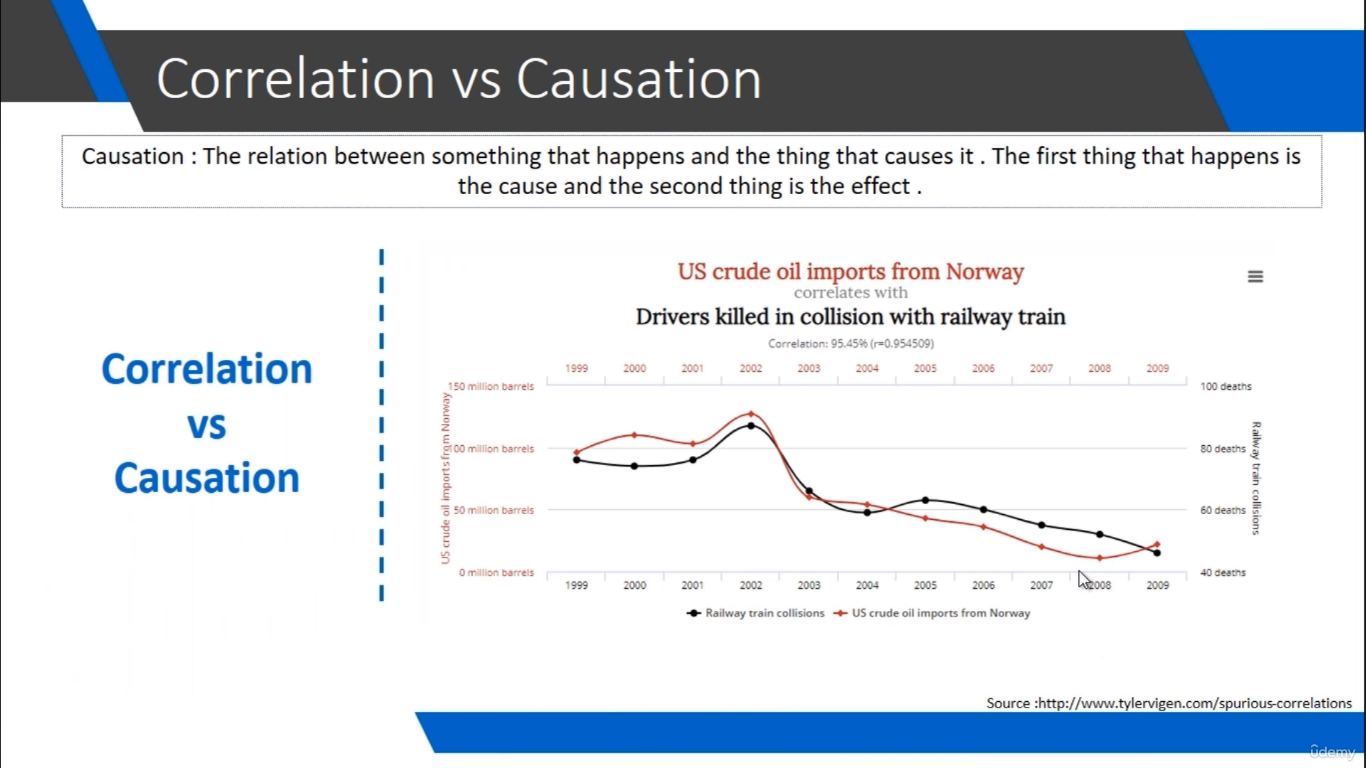

Such high value of correlation. May lead you to think that. These two variables are highly correlated and increasing. One of them may lead to increase in the other one. That is not the case. These two are completely random. Two variables. And they do not have any relationship amongst themselves.

So to establish cause and effect relationship, 
- one of the most common ways is to use the intuition to look back at the **business knowledge** and to find out whether the change in one of the variables actually impacts the change of the other variable or not. 
- The other method is a difficult one. It is setting up a **scientific experiment** where we manipulate the variable in a **controlled environment** and see the impact on the other variable.

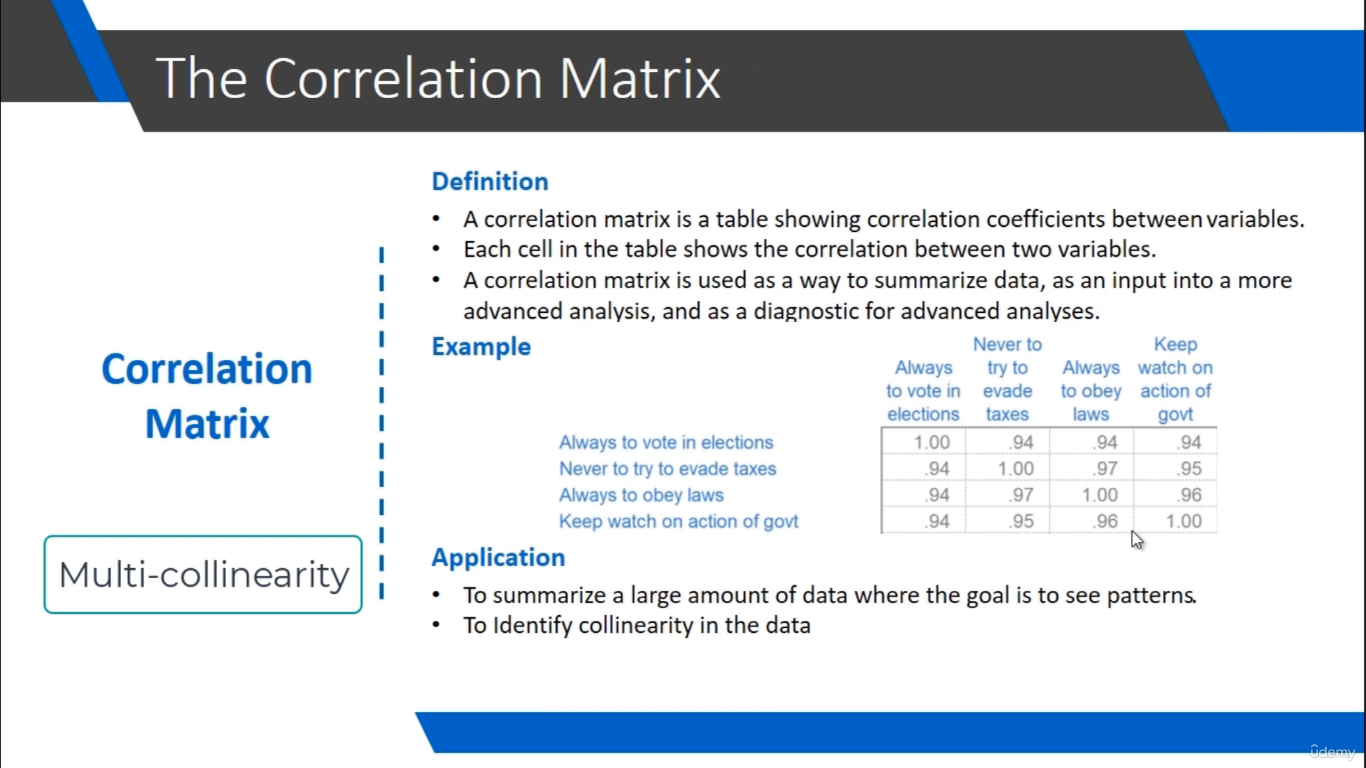

But why are we trying to find out correlation values between two independent variables? 

We are doing this because whenever there is correlation, the two correlated variables are moving together. Therefore, if one of them is linearly related individually with the dependent variable, then the other one will also show linear relationship with the dependent variable. But when you will take both the variables in your model and model has to assign relative importance to each of them. Really tedious job for the model. Every time you will show your model a new sample of data, it will assign different regression coefficients to these variables. This problem for the model is called **multicolinearity**.

Therefore, it is important that we identify **highly correlated independent variables** and **remove one** of the two so that multicolinearity can be avoided. 

But **which one** of the two would you **remove** and which one you would keep? 
- First try to keep the one which **makes more business sense**. 
- If **both make business sense**, look at the **correlation** coefficient of both with the **dependent variable**, whichever is **higher**. You may want to keep that one and remove the other one. 
    - If **both** of them are having the **same correlation** coefficient, then you may go and **pick** the variable for which the **data** is **easier to get**.

In [47]:
df.corr()

price  crime_rate  resid_area  air_qual  \
price                     1.000000   -0.466527   -0.484754 -0.429300   
crime_rate               -0.466527    1.000000    0.660283  0.707587   
resid_area               -0.484754    0.660283    1.000000  0.763651   
air_qual                 -0.429300    0.707587    0.763651  1.000000   
room_num                  0.696304   -0.288784   -0.391676 -0.302188   
age                      -0.377999    0.559591    0.644779  0.731470   
teachers                  0.505655   -0.390052   -0.383248 -0.188933   
poor_prop                -0.740836    0.608970    0.603800  0.590879   
n_hos_beds                0.108880   -0.004089    0.005799 -0.049553   
n_hot_rooms               0.017007    0.056570   -0.003761  0.007238   
rainfall                 -0.047200    0.082151    0.055845  0.091956   
parks                    -0.391574    0.638951    0.707635  0.915544   
avg_dist                  0.249289   -0.586371   -0.708022 -0.769247   
airport_YES               0.182867   -0.134486   -0.115401 -0.073903   
waterbody_Lake            0.036233   -0.025390   -0.026590 -0.046393   
waterbody_Lake and River -0.037497    0.009076    0.051649  0.013849   
waterbody_River           0.071751   -0.060099   -0.098976 -0.037772   

                          room_num       age  teachers  poor_prop  n_hos_beds  \
price                     0.696304 -0.377999  0.505655  -0.740836    0.108880   
crime_rate               -0.288784  0.559591 -0.390052   0.608970   -0.004089   
resid_area               -0.391676  0.644779 -0.383248   0.603800    0.005799   
air_qual                 -0.302188  0.731470 -0.188933   0.590879   -0.049553   
room_num                  1.000000 -0.240265  0.355501  -0.613808    0.032009   
age                      -0.240265  1.000000 -0.261515   0.602339   -0.021012   
teachers                  0.355501 -0.261515  1.000000  -0.374044   -0.008056   
poor_prop                -0.613808  0.602339 -0.374044   1.000000   -0.066008   
n_hos_beds                0.032009 -0.021012 -0.008056  -0.066008    1.000000   
n_hot_rooms               0.014583  0.013918 -0.037007   0.017036   -0.003130   
rainfall                 -0.064718  0.074684 -0.045928   0.061444    0.058596   
parks                    -0.282817  0.673850 -0.187004   0.552310   -0.071272   
avg_dist                  0.205241 -0.747906  0.232452  -0.496967   -0.027871   
airport_YES               0.163774  0.005101  0.069437  -0.095054   -0.006365   
waterbody_Lake           -0.004195  0.003452  0.048717   0.003197    0.042278   
waterbody_Lake and River  0.010554 -0.004354 -0.046981   0.020620    0.059482   
waterbody_River           0.046251 -0.088609  0.094256  -0.109004   -0.074148   

                          n_hot_rooms  rainfall     parks  avg_dist  \
price                        0.017007 -0.047200 -0.391574  0.249289   
crime_rate                   0.056570  0.082151  0.638951 -0.586371   
resid_area                  -0.003761  0.055845  0.707635 -0.708022   
air_qual                     0.007238  0.091956  0.915544 -0.769247   
room_num                     0.014583 -0.064718 -0.282817  0.205241   
age                          0.013918  0.074684  0.673850 -0.747906   
teachers                    -0.037007 -0.045928 -0.187004  0.232452   
poor_prop                    0.017036  0.061444  0.552310 -0.496967   
n_hos_beds                  -0.003130  0.058596 -0.071272 -0.027871   
n_hot_rooms                  1.000000  0.014869  0.023757 -0.020700   
rainfall                     0.014869  1.000000  0.078278 -0.037285   
parks                        0.023757  0.078278  1.000000 -0.707924   
avg_dist                    -0.020700 -0.037285 -0.707924  1.000000   
airport_YES                 -0.055338 -0.013171 -0.052503  0.021402   
waterbody_Lake               0.037925 -0.016170 -0.034991  0.034890   
waterbody_Lake and River     0.014755  0.109234  0.013265 -0.021320   
waterbody_River             -0.064096 -0.037016 -0.048862  0.03224

The **high correlation** between **two independent variables** leads to a problem known as **multicollinearity**.

For example, parks and air_qual. So we have to delete one of these two variables. There are multiple ways to select which variable to delete. First one is to check the correlation of these two variables with our dependent y variable. So, we keep air_qual.

In [48]:
del df['parks']

In [49]:
df.head()

price  crime_rate  resid_area  air_qual  room_num   age  teachers  \
0   24.0    0.006300       32.31     0.538     6.575  65.2      24.7   
1   21.6    0.026944       37.07     0.469     6.421  78.9      22.2   
2   34.7    0.026924       37.07     0.469     7.185  61.1      22.2   
3   33.4    0.031857       32.18     0.458     6.998  45.8      21.3   
4   36.2    0.066770       32.18     0.458     7.147  54.2      21.3   

   poor_prop  n_hos_beds  n_hot_rooms  rainfall  avg_dist  airport_YES  \
0       4.98       5.480     11.19200        23    4.0875            1   
1       9.14       7.332     12.17280        42    4.9675            0   
2       4.03       7.394     46.19856        38    4.9675            0   
3       2.94       9.268     11.26720        45    6.0650            1   
4       5.33       8.824     11.28960        55    6.0625            0   

   waterbody_Lake  waterbody_Lake and River  waterbody_River  
0               0                         0                1  
1               1                         0                0  
2               0                         0                0  
3               1                         0                0  
4               1                         0                0

# Model Creation: Linear Regression